In [5]:
from dolfin import *
#Meshandfunctionspace
import matplotlib.pyplot as plt
import NS_solver as ns 
import numpy as np
import GenerateData as gd
import MeshUtils as mutils

In [2]:
# !dolfin-convert data/mesh_test/RandomMesh_0.msh data/mesh_test/RandomMesh_0.xml

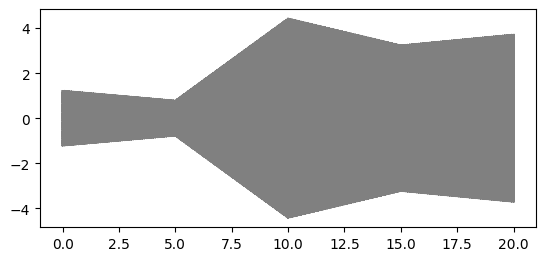

In [2]:
mesh_load = mu.MeshLoader("../data/mesh01/RandomMesh_1")
mesh = mesh_load.mesh
bounds = mesh_load.bounds
face = mesh_load.face
plot(mesh)

In [3]:
tags = {'walls': [1], 'inlet':[2], 'outlet': [3], 'interface': [4,5,6], 'faces': [7,8,9,10]}
# tags = {'walls':[1],'inlet':[2],'outlet':[3], 'interface': [8,9,10], 'faces': [11,12,13,14]}
mesh_load.update_tags(tags)
mesh_load.measure_definition()

(Measure('interior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f2fe50a0270>),
 Measure('exterior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f2fe50a0270>),
 Measure('cell', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f2fe50a2e30>))

In [4]:
V = VectorElement("P", mesh_load.mesh.ufl_cell(), 2)
Q = FiniteElement("P", mesh_load.mesh.ufl_cell(), 1)
rho = 1*1e3
mu = 4*1e-6
U0 = 0.001
L0 = 0.001
inflow = Expression(("(-1.0/4.0*x[1]*x[1] + 1)", " 0.0 "), degree=2)
dt = 0.5
T = 2
f = Constant((0.0, 0.0))


k = 1e-3
ns = gd.Stokes(mesh_load, V, Q, rho, mu, U0, L0, inflow, f, dt, T,k)
ns.solve()

# ns.plot_solution()

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.


In [5]:
data = gd.DataNS(ns, mesh_load)
data.nodes_data()
data.save_graph(output_dir = "data/graphs_test_NS/")

inlet
2
coordinate:  [ 0.  -1.2  0. ]
coordinate:  [ 0.  -1.1  0. ]
coordinate:  [0.  1.2 0. ]
coordinate:  [0.  1.1 0. ]
coordinate:  [ 0.  -1.1  0. ]
coordinate:  [ 0. -1.  0.]
coordinate:  [ 0. -1.  0.]
coordinate:  [ 0.  -0.9  0. ]
coordinate:  [ 0.  -0.9  0. ]
coordinate:  [ 0.  -0.8  0. ]
coordinate:  [ 0.  -0.8  0. ]
coordinate:  [ 0.  -0.7  0. ]
coordinate:  [ 0.  -0.7  0. ]
coordinate:  [ 0.  -0.6  0. ]
coordinate:  [ 0.  -0.6  0. ]
coordinate:  [ 0.  -0.5  0. ]
coordinate:  [ 0.  -0.5  0. ]
coordinate:  [ 0.  -0.4  0. ]
coordinate:  [ 0.  -0.4  0. ]
coordinate:  [ 0.  -0.3  0. ]
coordinate:  [ 0.  -0.3  0. ]
coordinate:  [ 0.  -0.2  0. ]
coordinate:  [ 0.  -0.2  0. ]
coordinate:  [ 0.  -0.1  0. ]
coordinate:  [ 0.  -0.1  0. ]
coordinate:  [ 0.00000000e+00 -3.12128101e-12  0.00000000e+00]
coordinate:  [ 0.00000000e+00 -3.12128101e-12  0.00000000e+00]
coordinate:  [0.  0.1 0. ]
coordinate:  [0.  0.1 0. ]
coordinate:  [0.  0.2 0. ]
coordinate:  [0.  0.2 0. ]
coordinate:  [0.  0.

Graph(num_nodes=5, num_edges=4,
      ndata_schemes={'x': Scheme(shape=(2,), dtype=torch.float32), 'k': Scheme(shape=(1, 1), dtype=torch.float32), 'NodeId': Scheme(shape=(), dtype=torch.float32), 'inlet_mask': Scheme(shape=(), dtype=torch.float32), 'outlet_mask': Scheme(shape=(), dtype=torch.float32), 'interface_length': Scheme(shape=(1, 1), dtype=torch.float32), 'flux': Scheme(shape=(1, 4), dtype=torch.float32), 'dt': Scheme(shape=(1, 1), dtype=torch.float32), 'T': Scheme(shape=(1, 1), dtype=torch.float32), 'pressure': Scheme(shape=(1, 4), dtype=torch.float32)}
      edata_schemes={'EdgeId': Scheme(shape=(), dtype=torch.float32), 'area': Scheme(shape=(1, 1), dtype=torch.float32), 'length': Scheme(shape=(1, 1), dtype=torch.float32)})

In [ ]:
self.V = VectorElement("P", self.mesh.mesh.ufl_cell(), 2)
self.Q = FiniteElement("P", self.mesh.mesh.ufl_cell(), 1)
self.rho = 1*1e3
self.mu = 4*1e-6
self.U0 = 0.001
self.L0 = 0.001
self.inflow = Expression(("(-1.0/4.0*x[1]*x[1] + 1)", " 0.0 "), degree=2)
self.dt = 0.5
self.T = 10
self.f = Constant((0.0, 0.0))

In [ ]:
center_line = []
tags_list = ['inlet','interface','outlet']
for j in tags_list:
    for i in tags[j]:
        edge_coord =[]
        for edge in edges(mesh):
            if bounds.array()[edge.index()] == i:
                for vertex in vertices(edge):
                    coordinate = vertex.point().array()
                    edge_coord.append(coordinate)

        edge_coord = np.array(edge_coord)
        center_line.append([(np.max(edge_coord[:,0])+np.min(edge_coord[:,0]))/2,(np.max(edge_coord[:,1])+np.min(edge_coord[:,1]))/2])

print(center_line)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [6]:
np.random.seed(50)
tags = {'walls':[1],'inlet':[2],'outlet':[3], 'interface': [4,5,6], 'faces': [7,8,9,10]}
# tags = {'walls':[1],'inlet':[2],'outlet':[3], 'interface': [4,5,6,7,8,9,10,11], 'faces': [12,13,14,15,16,17,18,19]}
for i in range(50):
    it = np.random.randint(0,20)
    mesh_load = mutils.MeshLoader(f"data/mesh01/RandomMesh_{it}")
    mesh = mesh_load.mesh
    bounds = mesh_load.bounds
    face = mesh_load.face
    mesh_load.update_tags(tags)
    mesh_load.measure_definition()
    set_log_active(False)
    V = VectorElement("P", mesh_load.mesh.ufl_cell(), 2)
    Q = FiniteElement("P", mesh_load.mesh.ufl_cell(), 1)
    rho = 1*1e3
    mu = 4*1e-6
    U0 = 0.001
    L0 = 0.001
    inflow = Expression(("(-1.0/4.0*x[1]*x[1] + 1)", " 0.0 "), degree=2)
    dt = 0.1
    T = 5
    f = Constant((0.0, 0.0))
    k = round(np.random.uniform(0, 10),5)
    ns = gd.Stokes(mesh_load, V, Q, rho, mu, U0, L0, inflow, f, dt, T, k)
    ns.solve()
    data = gd.DataNS(ns,mesh_load)
    data.save_graph(output_dir = "data/graphs_stokes/")

Graph saved to disk.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Graph saved to disk.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Graph saved to disk.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Graph saved to disk.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Graph saved to disk.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Graph saved to disk.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Graph saved to disk.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Graph saved to disk.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Graph saved to disk.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Graph saved to disk.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Graph saved to disk.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Graph saved to disk.
Calling FFC just-in-ti

KeyboardInterrupt: 

In [ ]:
import os
import json
import re

# Specify the directory containing .grph files
# input_directory = os.path.expanduser("~/Documents/pacs/pacsproj/data/graphs_rm2/")
input_directory = os.path.expanduser("data/graphs_stokes/")

# Get the full path
input_directory = os.path.realpath(input_directory)

# Initialize an empty dictionary to store JSON objects for each file
json_dict = {}

# Iterate through each .grph file in the directory
for graph_file in os.listdir(input_directory):
    if graph_file.endswith(".grph"):
        # Extract the filename without extension
        filename_no_extension = os.path.splitext(graph_file)[0]

        # Extract the mu parameter from the filename (assuming it is in the format k_11.3.grph)
        mu_match = re.search(r'_(\d+(\.\d+)?)', filename_no_extension)
        mu = mu_match.group(1) if mu_match else None

        # Create a dictionary for each .grph file
        json_dict[filename_no_extension] = {
            "model_type": "stokes_eq",
            # "T": 0.937,
            # "dt": 0.000937,
            # "time_shift": 0,
            # "bc_type": "RCR",
            "Re": mu
        }

# Save the dictionary as a JSON file
json_file_path = os.path.join(input_directory, "dataset_info.json")
with open(json_file_path, 'w') as json_file:
    json.dump(json_dict, json_file, indent=2)

print(f"Created {json_file_path}")